# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

In [0]:
import pandas as pd

In [0]:
url='https://raw.githubusercontent.com/agupta98/Tensorflow/master/bank_note_data.csv'
data=pd.read_csv(url)

** Check the head of the Data **

In [0]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [0]:
import seaborn as sns
%matplotlib inline

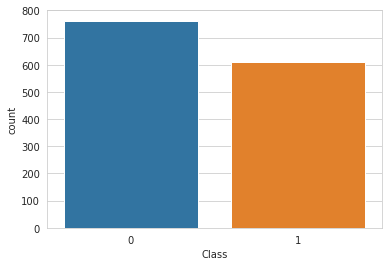

In [0]:
sns.set_style('whitegrid')
sns.countplot(data['Class'])
#Authentic=1 vs Fake=0

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


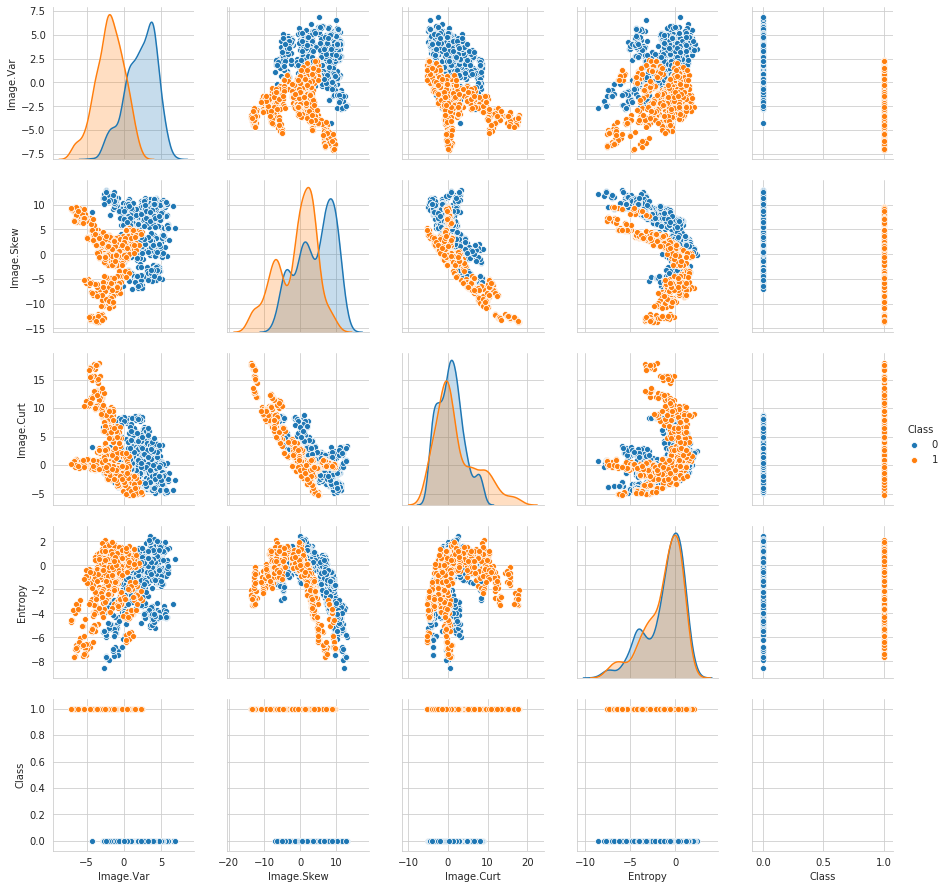

In [0]:
sns.pairplot(data,hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [0]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_f=scaler.fit_transform(data.drop('Class',axis=1))

In [0]:
ndata=pd.DataFrame(scaled_f,columns=data.columns[:-1])

In [0]:
ndata.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [0]:
X = ndata

In [0]:
y=data.Class

In [0]:
from sklearn.model_selection import train_test_split

Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series

In [0]:
X=X.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
y=y.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [0]:
import tensorflow as tf

In [0]:
import tensorflow.contrib.learn.python

from tensorflow.contrib.learn.python import learn as learn

In [0]:
feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier=learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10],n_classes=2)

In [0]:
classifier.fit(X_train,y_train,steps=200,batch_size=20)

In [0]:
predict=list(classifier.predict(X_test,as_iterable=True))

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(y_test,predict))

[[237   0]
 [  0 175]]


In [64]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       175

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
random=RandomForestClassifier()
random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict=random.predict(X_test)

In [73]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[236   1]
 [  4 171]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       237
           1       0.99      0.98      0.99       175

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

